In [186]:
import geopandas as gpd
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

# Open the file and load the JSON data
with open('osm_entry.json', 'r') as f:
    data = json.load(f)
with open('blocks_coordinates.json', 'r') as f:
    data1 = json.load(f)

In [187]:
features = [data[feature] for feature in data]

# Extract the properties from the features and convert them to a pandas DataFrame
properties = [feature['properties'] for feature in features]
df = gpd.pd.DataFrame(properties)
hdbid = df.iloc[:, [0, 8, -1]]

In [189]:
hdbid['osmid'].nunique()

10601

In [184]:
df1 = pd.DataFrame(data).T.dropna()
df1.head(3)

,type,properties,geometry
0,Feature,"{'osmid': 172927954, 'amenity': None, 'name': ...","{'type': 'MultiPolygon', 'coordinates': [[[[10..."
1,Feature,"{'osmid': 116692213, 'amenity': None, 'name': ...","{'type': 'MultiPolygon', 'coordinates': [[[[10..."
2,Feature,"{'osmid': 97585683, 'amenity': None, 'name': N...","{'type': 'MultiPolygon', 'coordinates': [[[[10..."


In [205]:
df1['geometry']

0        {'type': 'MultiPolygon', 'coordinates': [[[[10...
1        {'type': 'MultiPolygon', 'coordinates': [[[[10...
2        {'type': 'MultiPolygon', 'coordinates': [[[[10...
3        {'type': 'MultiPolygon', 'coordinates': [[[[10...
4        {'type': 'MultiPolygon', 'coordinates': [[[[10...
                               ...                        
11195    {'type': 'MultiPolygon', 'coordinates': [[[[10...
11196    {'type': 'MultiPolygon', 'coordinates': [[[[10...
11197    {'type': 'MultiPolygon', 'coordinates': [[[[10...
11198    {'type': 'MultiPolygon', 'coordinates': [[[[10...
11199    {'type': 'MultiPolygon', 'coordinates': [[[[10...
Name: geometry, Length: 11117, dtype: object

In [185]:
df2 = pd.DataFrame(data1).T.dropna()
df2.head(3)

,blk_no,street,address,latitude,longitude,hdb_blk_no,hdb_street,hdb_max_floor_lvl,hdb_year_completed,hdb_residential,...,hdb_3room_sold,hdb_4room_sold,hdb_5room_sold,hdb_exec_sold,hdb_multigen_sold,hdb_studio_apartment_sold,hdb_1room_rental,hdb_2room_rental,hdb_3room_rental,hdb_other_room_rental
0,1,BEACH RD,1 BEACH RD,1.3036713506088,103.864478660925,1,BEACH RD,16,1970,Y,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,1 BEDOK STH AVE 1,1.32085208689731,103.933721091441,1,BEDOK STH AVE 1,14,1975,Y,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,1 CANTONMENT RD,1.27548808568155,103.841419048957,1,CANTONMENT RD,2,2010,N,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df21 = df2.drop(columns=['blk_no','street', 'address','latitude', 'longitude','hdb_blk_no','hdb_market_hawker',
       'hdb_miscellaneous', 'hdb_multistorey_carpark', 'hdb_precinct_pavilion',
       'hdb_bldg_contract_town','hdb_1room_rental', 'hdb_2room_rental', 'hdb_3room_rental',
       'hdb_other_room_rental'])
df21.keys()

Index(['hdb_street', 'hdb_max_floor_lvl', 'hdb_year_completed',
       'hdb_residential', 'hdb_commercial', 'hdb_total_dwelling_units',
       'hdb_1room_sold', 'hdb_2room_sold', 'hdb_3room_sold', 'hdb_4room_sold',
       'hdb_5room_sold', 'hdb_exec_sold', 'hdb_multigen_sold',
       'hdb_studio_apartment_sold'],
      dtype='object')

In [192]:
hdbid.shape[0]

11117

In [194]:
df21.shape[0]

12591

In [209]:
df21 = df21.iloc[:hdbid.shape[0]].reset_index(drop=True)
df21.shape[0]

11117

In [210]:
merged_df = pd.merge(hdbid, df21, left_index=True, right_index=True, how='left')
# col = merged_df.pop(merged_df.columns[-3])
# merged_df.insert(0, col.name, col)
merged_df.head(3)

,osmid,building_l,build_foot,hdb_street,hdb_max_floor_lvl,hdb_year_completed,hdb_residential,hdb_commercial,hdb_total_dwelling_units,hdb_1room_sold,hdb_2room_sold,hdb_3room_sold,hdb_4room_sold,hdb_5room_sold,hdb_exec_sold,hdb_multigen_sold,hdb_studio_apartment_sold
0,172927954,16,8.192955e-08,BEACH RD,16,1970,Y,Y,142,0,1,138,1,2,0,0,0
1,116692213,14,1.200548e-07,BEDOK STH AVE 1,14,1975,Y,N,206,0,0,204,0,2,0,0,0
2,97585683,50,6.600365e-08,CANTONMENT RD,2,2010,N,Y,0,0,0,0,0,0,0,0,0


In [174]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12591 entries, 0 to 12673
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   street                     12591 non-null  object
 1   address                    12591 non-null  object
 2   hdb_street                 12591 non-null  object
 3   hdb_max_floor_lvl          12591 non-null  object
 4   hdb_year_completed         12591 non-null  object
 5   hdb_residential            12591 non-null  object
 6   hdb_commercial             12591 non-null  object
 7   hdb_total_dwelling_units   12591 non-null  object
 8   hdb_1room_sold             12591 non-null  object
 9   hdb_2room_sold             12591 non-null  object
 10  hdb_3room_sold             12591 non-null  object
 11  hdb_4room_sold             12591 non-null  object
 12  hdb_5room_sold             12591 non-null  object
 13  hdb_exec_sold              12591 non-null  object
 14  hdb_multige

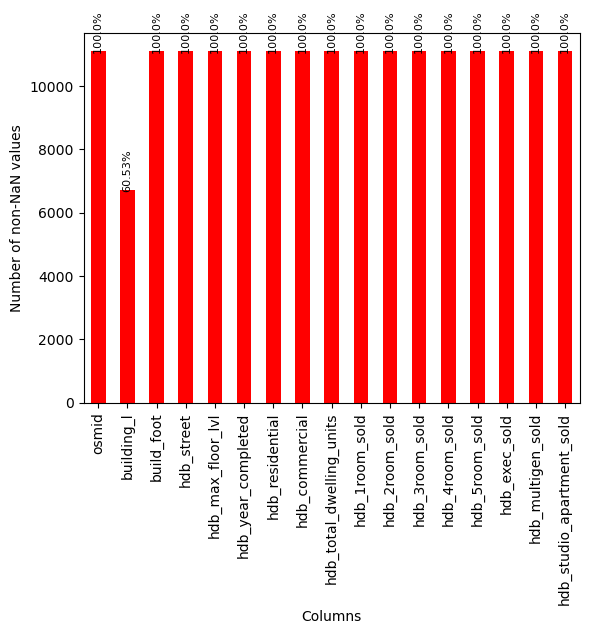

In [211]:
# get the count of non-NaN values for each column
gdfy = merged_df
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [212]:
merged_df.to_csv('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_HDB.csv', index=False)